# MNIST 손글씨 Deep-Learning
### DNN better model

In [199]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [200]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [201]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

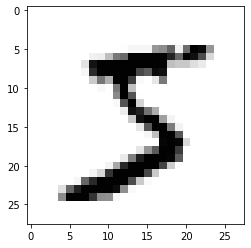

In [202]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [203]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d ' % i)
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [204]:
# X_train 정규화
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255.0

In [205]:
X_train.shape

(60000, 784)

In [206]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [207]:
Y_class_train[0]

5

In [208]:
# One-Hot Encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

In [209]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [210]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import os

In [211]:
# seed 값 설정
seed = 0
np.random.seed(seed)

In [212]:
# 모델 프레임 설정
model = Sequential([
    Dense(900, input_dim=784, activation='relu'),
    Dense(450, activation='relu'),
    Dense(225, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 900)               706500    
_________________________________________________________________
dense_40 (Dense)             (None, 450)               405450    
_________________________________________________________________
dense_41 (Dense)             (None, 225)               101475    
_________________________________________________________________
dense_42 (Dense)             (None, 10)                2260      
Total params: 1,215,685
Trainable params: 1,215,685
Non-trainable params: 0
_________________________________________________________________


In [213]:
from tensorflow.keras.optimizers import Adam
# 모델 실행 환경 설정 
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

In [214]:
# 모델 최적화 설정
MODEL_DIR = './model/mnist/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [215]:
modelpath = MODEL_DIR + "mnist_best_model.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [216]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=100, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.23001, saving model to ./model/mnist/mnist_best_model.hdf5

Epoch 00002: val_loss improved from 0.23001 to 0.16652, saving model to ./model/mnist/mnist_best_model.hdf5

Epoch 00003: val_loss improved from 0.16652 to 0.13530, saving model to ./model/mnist/mnist_best_model.hdf5

Epoch 00004: val_loss improved from 0.13530 to 0.11829, saving model to ./model/mnist/mnist_best_model.hdf5

Epoch 00005: val_loss improved from 0.11829 to 0.10778, saving model to ./model/mnist/mnist_best_model.hdf5

Epoch 00006: val_loss improved from 0.10778 to 0.10053, saving model to ./model/mnist/mnist_best_model.hdf5

Epoch 00007: val_loss improved from 0.10053 to 0.09529, saving model to ./model/mnist/mnist_best_model.hdf5

Epoch 00008: val_loss improved from 0.09529 to 0.09263, saving model to ./model/mnist/mnist_best_model.hdf5

Epoch 00009: val_loss improved from 0.09263 to 0.09124, saving model to ./model/mnist/mnist_best_model.hdf5

Epoch 00010: val_loss 

In [219]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/mnist/mnist_best_model.hdf5')

In [220]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=2)[1]))

10000/10000 - 1s - loss: 0.0660 - accuracy: 0.9805

 Test Accuracy: 0.9805


In [221]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

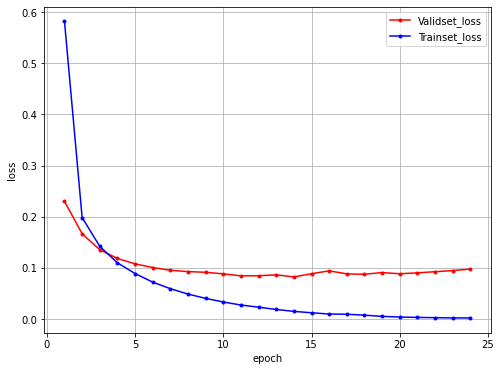

In [222]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### CNN better model

In [23]:
import numpy as np
import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [25]:
# 데이터 불러오기
# 학습데이터 reshape -> 정규화
# Y 정규화
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float')/255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [26]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(64, (2, 2), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)             

In [27]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [28]:
# 모델 최적화 설정
MODEL_DIR = './model/mnist/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [29]:
modelpath = MODEL_DIR + "mnist-cnn-best-model.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [30]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30,
                   batch_size=200, 
                   callbacks=[early_stopping_callback, checkpointer])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.2418 - accuracy: 0.9262
Epoch 00001: val_loss improved from inf to 0.07164, saving model to ./model/mnist/mnist-cnn-best-model.hdf5
48000/48000 [==============================] - 21s 430us/sample - loss: 0.2412 - accuracy: 0.9263 - val_loss: 0.0716 - val_accuracy: 0.9798
Epoch 2/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.0682 - accuracy: 0.9785
Epoch 00002: val_loss improved from 0.07164 to 0.04776, saving model to ./model/mnist/mnist-cnn-best-model.hdf5
48000/48000 [==============================] - 20s 422us/sample - loss: 0.0681 - accuracy: 0.9785 - val_loss: 0.0478 - val_accuracy: 0.9864
Epoch 3/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.0519 - accuracy: 0.9832
Epoch 00003: val_loss improved from 0.04776 to 0.04267, saving model to ./model/mnist/mnist-cnn-best-model.hdf5
48000/48000 [=========================

In [31]:
from tensorflow.keras.models import load_model
del model
model =load_model('./model/mnist/mnist-cnn-best-model.hdf5')

In [32]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=0)[1]))


 Test Accuracy: 0.9924


In [33]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

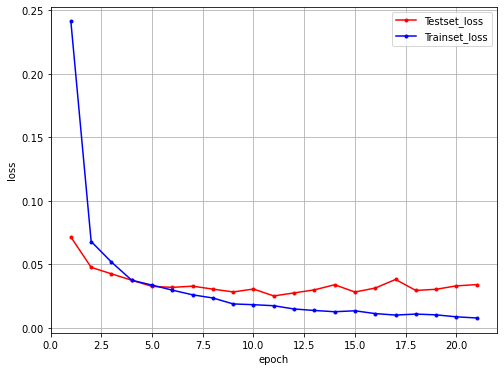

In [34]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()